In [191]:
# importation of libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
import datetime
import warnings

<div>
<h1 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px">Data Information</h1>
<p>This data was collected via IoT devices from June 25th, 2019 to April 14th, 2020 which was updated every 15 minutes.</p>

<div style="display:flex">
<div>
<b>Overview</b>
<ul>
    <li>OTI- Oil Temperature Indicator</li>
    <li>WTI- Winding Temperature Indicator</li>
    <li>ATI- Ambient Temperature Indicator</li>
    <li>OLI- Oil Level Indicator</li>
    <li>OTIA- Oil Temperature Indicator Alarm OTIT</li>
    <li>Oil Temperature Indicator Trip</li>
    <li>MOG_A- Magnetic oil gauge indicator</li>
</ul>
</div>
<div>
<b>CurrentVoltage</b>
<ul>
    <li>VL1- Phase Line 1</li>
    <li>VL2- Phase Line 2</li>
    <li>VL3- Phase Line 3</li>
    <li>IL1- Current Line 1</li>
    <li>IL2- Current Line 2</li>
    <li>IL3- Current Line 3</li>
    <li>VL12- Voltage line 1 2</li>
    <li>VL23- Voltage line 2 3</li>
    <li>VL31- Voltage line 3 1</li>
    <li>INUT- Neutral Current</li>
</ul>
</div>
</div>
</div>

In [192]:
# Transformer data overview
tf = pd.read_csv('Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [193]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [194]:
# transformer current and voltage overview
current_voltage_data = pd.read_csv('CurrentVoltage.csv')
display(current_voltage_data.shape)
current_voltage_data.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [195]:
# Converting to datetime datatype
current_voltage_data['DeviceTimeStamp'] = pd.to_datetime(current_voltage_data['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')
current_voltage_data.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [196]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, current_voltage_data, on='DeviceTimeStamp', how='outer')
transformer.sample(5)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
20788,2020-04-08 05:30:00,28.0,1.0,27.0,100.0,0.0,0.0,0.0,249.4,247.9,246.1,44.6,29.6,55.0,430.6,427.2,430.7,22.0
9718,2019-10-08 22:15:00,30.0,0.0,28.0,55.0,0.0,0.0,0.0,239.5,240.0,239.6,100.0,95.4,121.6,414.0,416.4,414.2,23.9
10538,2019-10-17 00:30:00,26.0,0.0,26.0,65.0,0.0,0.0,0.0,242.2,241.6,240.6,82.3,50.6,87.7,419.1,416.8,419.8,35.0
6341,2019-08-28 07:45:00,34.0,0.0,30.0,41.0,0.0,0.0,0.0,238.6,238.6,238.0,63.6,51.8,64.6,413.3,412.4,412.6,12.5
1252,2019-06-28 16:33:00,34.0,0.0,35.0,39.0,0.0,0.0,0.0,240.0,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
transformer.corr()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
DeviceTimeStamp,1.000000,-0.215855,0.808141,-0.373022,0.909024,-0.076326,-0.039753,-0.360726,0.566225,0.523200,0.500585,0.079370,-0.099449,0.103789,0.587561,0.581343,0.584102,0.398554
OTI,-0.215855,1.000000,-0.151634,0.555323,-0.310544,0.572106,0.841586,0.106204,-0.401972,-0.386647,-0.398918,0.223816,0.265932,0.184335,-0.121286,-0.119539,-0.119303,0.002264
WTI,0.808141,-0.151634,1.000000,-0.253544,0.646328,-0.040990,-0.027926,-0.199197,0.479985,0.443963,0.455670,-0.087114,-0.205780,-0.077332,0.278568,0.274219,0.277195,0.190043
ATI,-0.373022,0.555323,-0.253544,1.000000,-0.505921,0.057483,0.061639,0.120831,-0.519489,-0.488130,-0.507134,0.170517,0.216702,0.083264,-0.381861,-0.379714,-0.380354,-0.121198
OLI,0.909024,-0.310544,0.646328,-0.505921,1.000000,-0.077069,-0.053011,-0.364564,0.695694,0.641384,0.628254,-0.054966,-0.218043,-0.022133,0.496608,0.488649,0.493130,0.305539
OTI_A,-0.076326,0.572106,-0.040990,0.057483,-0.077069,1.000000,0.681291,-0.011952,-0.027957,-0.027149,-0.022969,-0.030714,-0.011075,-0.029136,-0.082487,-0.082501,-0.082085,-0.049120
OTI_T,-0.039753,0.841586,-0.027926,0.061639,-0.053011,0.681291,1.000000,0.000734,-0.065668,-0.066590,-0.067162,0.036427,0.051980,0.043669,0.007328,0.007515,0.007964,0.006896
MOG_A,-0.360726,0.106204,-0.199197,0.120831,-0.364564,-0.011952,0.000734,1.000000,-0.338755,-0.333207,-0.304581,0.218962,0.311743,0.206299,0.085149,0.090594,0.090419,0.012732
VL1,0.566225,-0.401972,0.479985,-0.519489,0.695694,-0.027957,-0.065668,-0.338755,1.000000,0.932646,0.974027,-0.508030,-0.598317,-0.476238,0.097260,0.085626,0.095662,-0.071786
VL2,0.523200,-0.386647,0.443963,-0.488130,0.641384,-0.027149,-0.066590,-0.333207,0.932646,1.000000,0.887271,-0.489850,-0.576262,-0.465868,0.077068,0.062701,0.058115,-0.082146


In [198]:
#data info
data_row_lenght=transformer.shape[0]
data_column_lenght = transformer.shape[1]
print("Number of rows are:",data_row_lenght)
print("Number of columns are:",data_column_lenght)

Number of rows are: 21361
Number of columns are: 18


In [199]:
import warnings
warnings.filterwarnings('ignore')


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

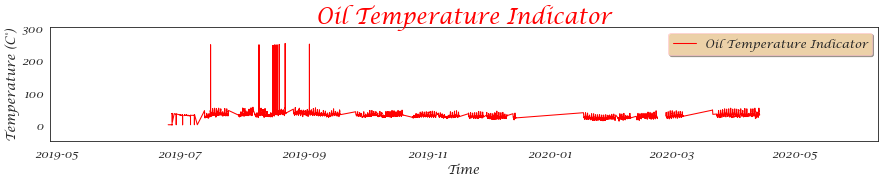

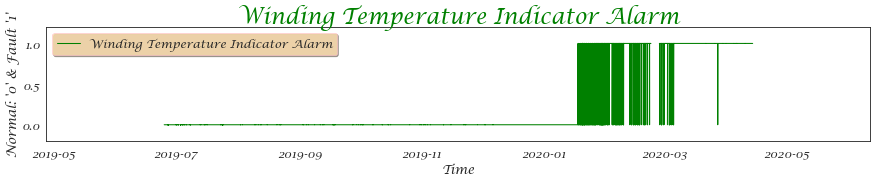

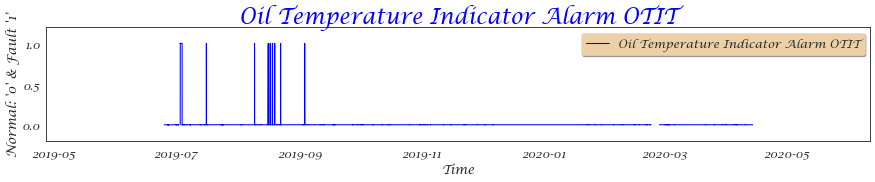

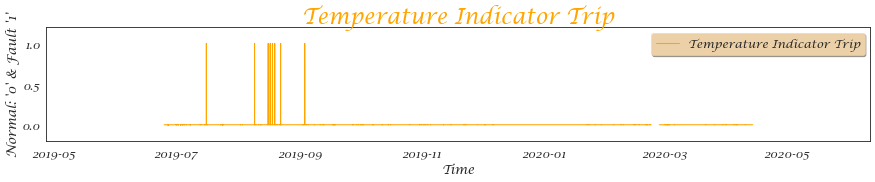

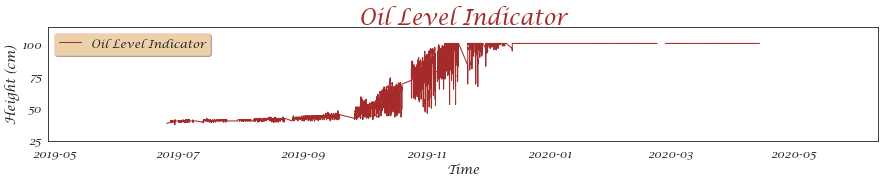

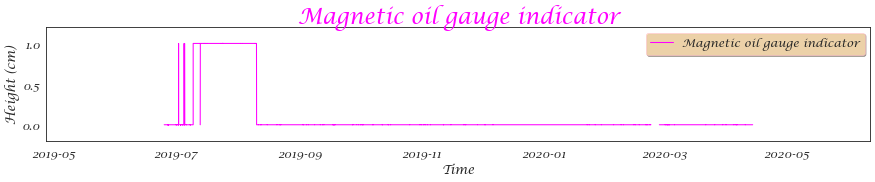

In [200]:
# visualization of data structure
title_fontsize = 30
xlabel_label = "Time"
ylabel_labels = {
    "OTI": "Temperature (C°)",
    "WTI": "Normal: '0' & Fault '1'",
    "OTI_A": "Normal: '0' & Fault '1'",
    "OTI_T": "Normal: '0' & Fault '1'",
    "OLI": "Height (cm)",
    "MOG_A": "Height (cm)"
}
fig_width, fig_height = 18, 4  # Adjust figure size as needed
signals = [
    ("OTI", "Oil Temperature Indicator", "red"),
    ("WTI", "Winding Temperature Indicator Alarm", "green"),
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", "blue"),
    ("OTI_T", "Temperature Indicator Trip", "orange"),
    ("OLI", "Oil Level Indicator", "brown"),
    ("MOG_A", "Magnetic oil gauge indicator", "magenta")
]
# Create and plot each time series with specific labels and colors
for signal_name, label, color in signals:
    plt.figure(figsize=(fig_width, fig_height))
    plt.plot(transformer.DeviceTimeStamp, transformer[signal_name], label=label, color=color)
    plt.title(f"{label}", fontsize=title_fontsize, color=color)
    plt.legend()
    plt.xlabel(xlabel_label)
    plt.ylabel(ylabel_labels[signal_name])
    plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Classified Data Visualization (OTI_A,OTI_T,MOG_A)</h3>

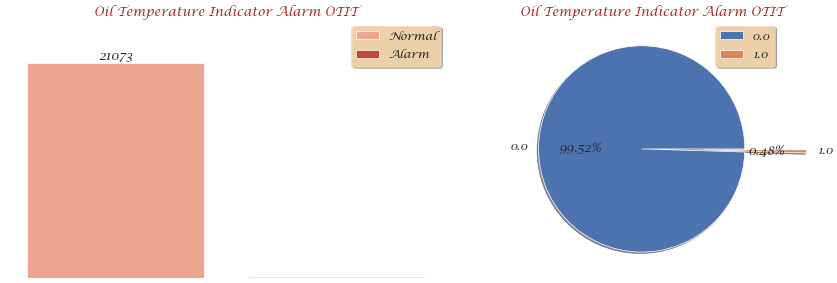

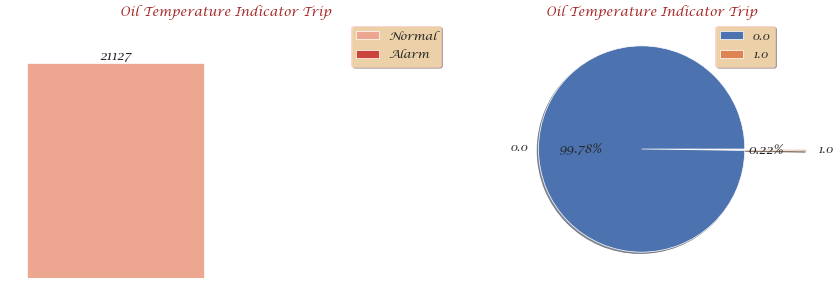

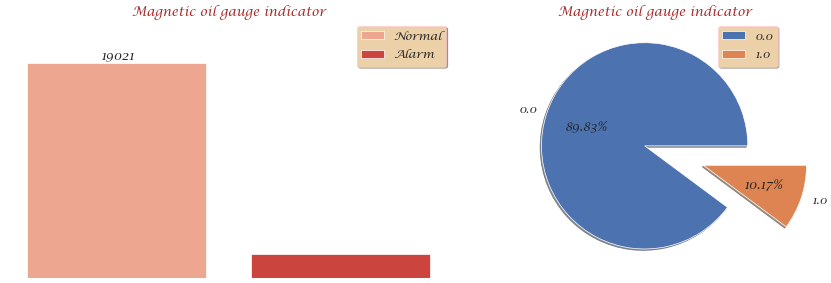

In [201]:
# The dataset contain three alarms which are listed below
# List of signals and their alarm states
signals = [
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", 'Reds', ['Normal', 'Alarm']),
    ("OTI_T", "Oil Temperature Indicator Trip", 'Reds', ['Normal', 'Alarm']),
    ("MOG_A", "Magnetic oil gauge indicator", 'Reds', ['Normal', 'Alarm'])
]

fig_width, fig_height = 18, 6  # Adjust figure size as needed

# Create a figure and subplots for each signal
for signal_name, title, palette, labels in signals:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

    # Count plot (ax1)
    ax1 = sns.countplot(x=signal_name, data=transformer, palette=palette, ax=ax1,hue=signal_name,legend=False)
    ax1.bar_label(ax1.containers[0])
    ax1.set_title(title, color='brown')
    ax1.legend(labels=labels)
    ax1.axis('off')

    # Pie chart (ax2)
    ax2 = transformer[signal_name].value_counts().plot.pie(
        explode=[0.1, 0.5], autopct='%1.2f%%', shadow=True, ax=ax2,)
    ax2.set_title(label=title,color='brown')
    ax2.legend()
    ax2.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</span>

<div style="font-weight:bold;color:green;font-size:18px">WORKING ON THE MAGNETIC FAULT ALARM DATA AS OUR DEPENDENT VAIRABLE</div>

In [202]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1).fillna(0) #independent variables 
y = transformer['MOG_A'].fillna(0) #dependent vairable


X.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,38.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,38.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,39.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X_train.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
12880,26.0,0.0,26.0,97.0,0.0,0.0,245.7,244.4,243.1,39.1,32.7,51.6,424.2,422.1,424.0,19.8
13961,25.0,0.0,25.0,100.0,0.0,0.0,247.2,246.2,244.2,66.7,44.5,61.0,427.5,425.0,426.4,19.9
617,33.0,0.0,34.0,39.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7449,40.0,0.0,35.0,41.0,0.0,0.0,236.7,234.9,236.3,83.6,89.0,92.0,407.9,407.2,410.3,7.2
3816,35.0,0.0,31.0,39.0,0.0,0.0,235.2,234.1,235.3,60.9,51.5,75.1,404.4,404.1,407.0,23.4


<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</span>

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1 style="color:white;background-color:Red;padding:2%;border-radius:150px 150px;font-size:3em;text-align:center">Model Implementation</h1>

<h2 style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">1. Random ForestClassifier</h2>

In [205]:
testing_accuracy= "Testing Accuracy :"
training_accuracy="Training Accuracy :"
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier


In [223]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create a Random Forest Classifier with 100 estimators
random_forest = RandomForestClassifier(n_estimators=100)

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate training and testing accuracy
random_forest_train_accuracy = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_test_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)





<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Classification Report</h3>

In [222]:
# Print training and testing accuracy with color escape sequences
print(f"\033[1mTraining Accuracy:\033[0m {random_forest_train_accuracy:.4f}%")
print(f"\033[1mTesting Accuracy:\033[0m {random_forest_test_accuracy:.4f}%")

# Print classification report with clear formatting
print("\n\033[1mClassification Report:\033[0m")
print(classification_report(y_test, y_pred_rf))

Training Accuracy: 99.9600%
Testing Accuracy: 98.3600%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3826
         1.0       0.90      0.95      0.92       447

    accuracy                           0.98      4273
   macro avg       0.95      0.97      0.96      4273
weighted avg       0.98      0.98      0.98      4273



<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; ; color:#FBFAFC;padding:5px ">Random Forest confusion matrix</h3>

<Figure size 450x350 with 0 Axes>

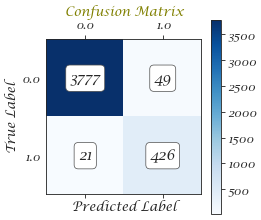

In [207]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Blues)  # Adjust colormap as desired
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate Random Forest F1-score, recall, and precision</h3>

In [208]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

random_forest_f1 = f1_score(y_test, y_pred_rf, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_rf, average='weighted')
random_forest_precision = precision_score(y_test, y_pred_rf, average='weighted')
# precision_scores.append(random_forest_precision)
# recall_scores.append(random_forest_recall)
# f1_scores.append(random_forest_f1)
# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{random_forest_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{random_forest_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{random_forest_precision:.4f}") 


F1-score: 0.9838
Recall: 0.9836
Precision: 0.9843


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Random Forest ROC Curve</h3>

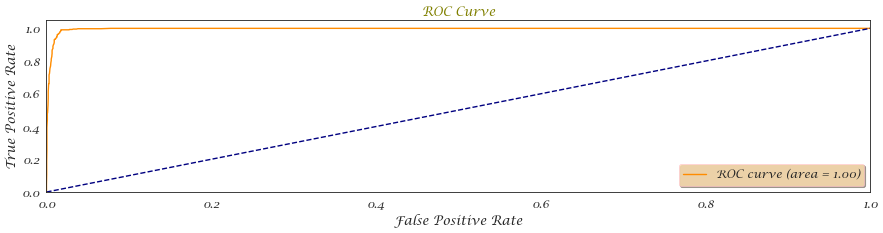

In [209]:
# ROC Curve (replace 'y_score' with your actual predicted probabilities if needed)
from sklearn.metrics import roc_curve, auc

y_score = random_forest.predict_proba(X_test)[:, 1]  # Assuming binary classification

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">
            <h2 style="padding: 15px;color:white;">2. XGB Classiher</h2>
</div>

In [210]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train_accuracy = round(xgb.score(X_train, y_train) * 100, 2)
xgb_test_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print(training_accuracy,xgb_train_accuracy ,"%")
print(testing_accuracy,xgb_test_accuracy ,"%")
print("\033[1m\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))



Training Accuracy : 99.94 %
Testing Accuracy : 98.53 %

Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3826
         1.0       0.91      0.95      0.93       447

    accuracy                           0.99      4273
   macro avg       0.95      0.97      0.96      4273
weighted avg       0.99      0.99      0.99      4273



<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate XGBoost F1-score, recall, and precision</h3>

In [211]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_xgb, average='weighted')
xgb_precision = precision_score(y_test, y_pred_xgb, average='weighted')

# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{xgb_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{xgb_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{xgb_precision:.4f}") 


F1-score: 0.9854
Recall: 0.9853
Precision: 0.9857


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost confusion matrix</h3>

<Figure size 450x350 with 0 Axes>

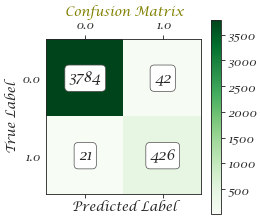

In [212]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Greens)  
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost ROC Curve</h3>

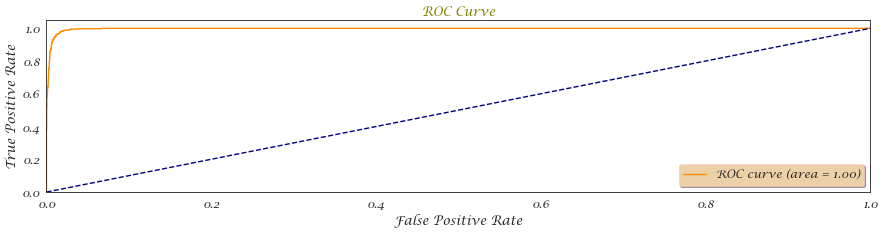

In [213]:
# ROC Curve
from sklearn.metrics import roc_curve, auc

y_score = xgb.predict_proba(X_test)[:, 1]  #  binary classification

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

plt.show()

<div style="
            background-color:cyan;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:5px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<h1>Comparing Multiple Models</h1>
</div>

In [214]:
models = pd.DataFrame({
    'Model': [
        'Random Forest','XGBClassifier'
    ],
    'Training Accuracy': [
        random_forest_train_accuracy,
        xgb_train_accuracy
    ],
    'Testing Accuracy Score': [
        random_forest_test_accuracy,
        xgb_test_accuracy
    ],
     'F1 Score': [
        random_forest_f1,
        xgb_f1
    ],
     'Precision': [
        random_forest_precision,
        xgb_precision
    ]
    , 'Recall': [
        random_forest_recall,
        xgb_recall
    ]
})


In [215]:
# pd.set_option('precision',1)
print("model accuracy table")
models.sort_values(by='Testing Accuracy Score', ascending=False)

model accuracy table


,Model,Training Accuracy,Testing Accuracy Score,F1 Score,Precision,Recall
1,XGBClassifier,99.94,98.53,0.985405,0.985670,0.985256
0,Random Forest,99.96,98.36,0.983837,0.984258,0.983618


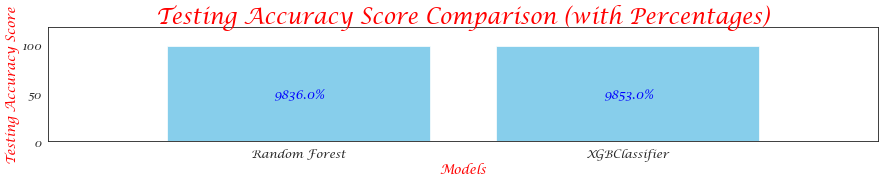

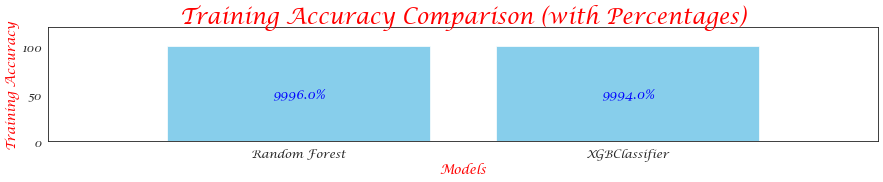

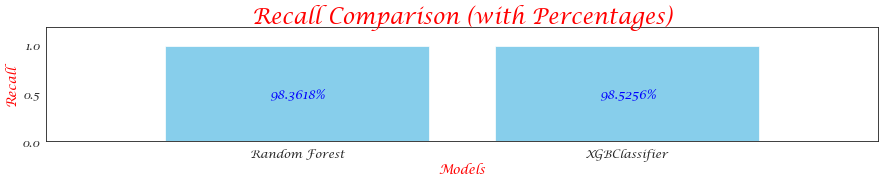

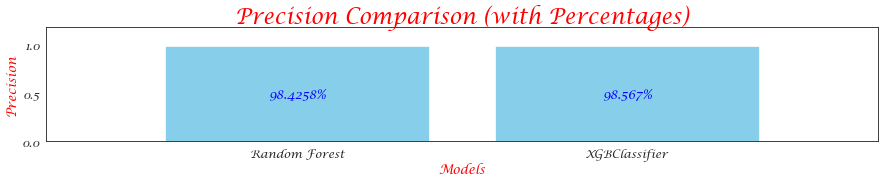

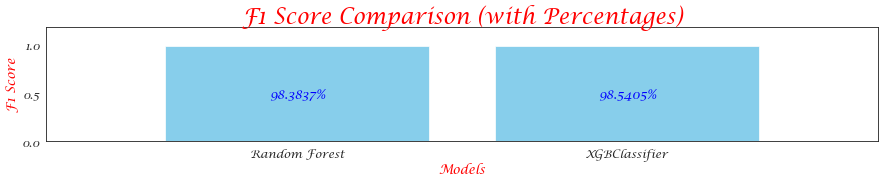

In [216]:
def create_bar_chart(metric_name, metric_values):

  fig, ax = plt.subplots(figsize=(fig_width, 4)) 

  # Extract model names (assuming "Model" key exists, handle potential absence)
  model_names = models.get("Model", list(models.keys()))  

  # Create the bar chart
  bars = ax.bar(model_names, metric_values, color='skyblue')  # Create bars

  # Round metric values and format as percentages for annotations
  percentages = [f"{round(score * 100, 4)}%" for score in metric_values]  # Calculate percentages, round to 4 decimals, format as strings

  # Annotate percentages on top of bars with centered alignment
  ax.bar_label(bars, percentages, label_type='center',color="blue")

  # Set x-axis labels and title
  ax.set_xlabel('Models',color="red")
  ax.set_ylabel(metric_name,color="red")
  ax.set_title(f'{metric_name} Comparison (with Percentages)', fontsize=30,color="red")


  plt.tight_layout()
  plt.show()

# Create bar charts for Recall, Precision,testing accuracy score and F1 Score
create_bar_chart("Testing Accuracy Score", models["Testing Accuracy Score"])
create_bar_chart("Training Accuracy", models["Training Accuracy"])
create_bar_chart("Recall", models["Recall"])
create_bar_chart("Precision", models["Precision"])
create_bar_chart("F1 Score", models["F1 Score"])



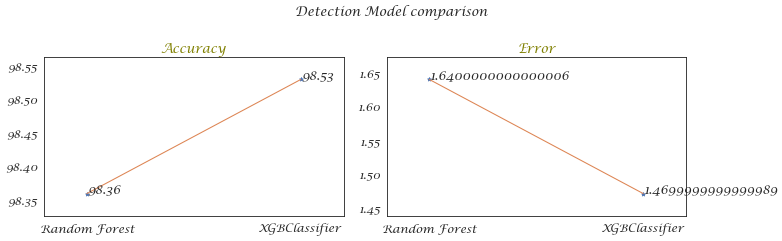

In [217]:
fig,ax = plt.subplots(1,2)
fig.set_figwidth(16)
fig.suptitle('Detection Model comparison')
x = [0,1]

ax[0].set_xticks(x)
ax[0].set_xticklabels(models["Model"])
ax[0].set_title('Accuracy')
ax[0].plot(models["Testing Accuracy Score"],'*')
ax[0].plot(models["Testing Accuracy Score"])
for i in range(len(models["Testing Accuracy Score"])):
    models["Testing Accuracy Score"][i] = round(models["Testing Accuracy Score"][i],4)
for i,j in zip(x,models["Testing Accuracy Score"]):
    ax[0].annotate(str(j),xy=(i,j))

ax[1].set_xticks(x)
ax[1].set_xticklabels(models["Model"])
ax[1].set_title('Error')
ax[1].plot((100-models["Testing Accuracy Score"]),'*')
ax[1].plot((100-models["Testing Accuracy Score"]))
for i in range(len((100-models["Testing Accuracy Score"]))):
    (100-models["Testing Accuracy Score"])[i] = round((100-models["Testing Accuracy Score"])[i],4)
for i,j in zip(x,(100-models["Testing Accuracy Score"])):
    ax[1].annotate(str(j),xy=(i,j))

<b><h2>Cross Checking XGBoost</h2></b>

In [218]:
prediction_xgb = xgb.predict(X_test)
print(prediction_xgb)


[0 0 0 ... 0 0 0]


In [219]:
cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_xgb})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })


,Actual,Predicted
10551,0.000000,0
9708,0.000000,0
2678,0.000000,0
6234,0.000000,0
16434,0.000000,0
3848,1.000000,1
2754,0.000000,0
15208,0.000000,0
18626,0.000000,0
6956,0.000000,0


<b><h1>Cross Checking Random Forest</h1></b>

In [220]:
prediction_rf = random_forest.predict(X_test)
print(prediction_rf)

[0. 0. 0. ... 0. 0. 0.]


In [221]:

cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rf})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })

,Actual,Predicted
20466,0.000000,0.000000
6126,0.000000,0.000000
5537,0.000000,0.000000
16343,0.000000,0.000000
11037,0.000000,0.000000
11195,0.000000,0.000000
3919,1.000000,1.000000
2789,1.000000,1.000000
15110,0.000000,0.000000
1202,0.000000,0.000000
